In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import pandas as pd
import load
import descriptions
import matplotlib.pyplot as plt

In [2]:
tables = load.all_tables(add_descriptions=True)

In [7]:
table = pd.merge(tables['sact_regimen'],tables['sact_drug_detail'],
                 how='right')
table["LEFT"] = "MAPPED_REGIMEN = " + table["MAPPED_REGIMEN"].astype(str)
table["RIGHT"] = "DRUG_GROUP = " + table["DRUG_GROUP"].astype(str)

grouped = table.groupby(["LEFT", "RIGHT"]).size()
edges, weights = np.array(grouped.index), np.array(grouped)

G = nx.DiGraph()
G.add_edges_from(edges)

nx.set_edge_attributes(G, dict(zip(edges, weights)), 'weight')

list(nx.to_edgelist(G))

[('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = ABIRATERONE',
  {'weight': 1}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = ATG',
  {'weight': 1}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = BENDAMUSTINE',
  {'weight': 10}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = BEVACIZUMAB',
  {'weight': 1}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = BLEOMYCIN',
  {'weight': 18}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = CAPECITABINE',
  {'weight': 3}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = CARBOPLATIN',
  {'weight': 6}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = CARMUSTINE',
  {'weight': 1}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = CISPLATIN',
  {'weight': 26}),
 ('MAPPED_REGIMEN = 111 Trial (formerly BEP 111)',
  'DRUG_GROUP = CYCLOPHOSPHAMIDE',
  {'weight': 26}),
 ('MAPPED_RE

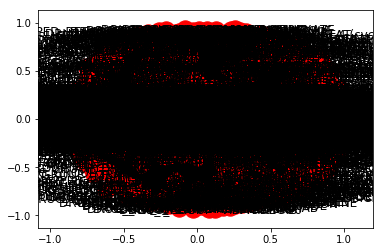

In [11]:
nx.draw_networkx(G.subgraph(list(nx.all_neighbors(G, 
    "MAPPED_REGIMEN = BLEOMYCIN")).append("MAPPED_REGIMEN = BLEOMYCIN")), with_labels=True)

In [15]:
def how_many_per(big_group, small_group):
    table = tables['sact_' + small_group.lower()]
    grouped = table.groupby("MERGED_" + big_group.upper() + "_ID").size()
    print(grouped.describe())
    plt.hist(grouped, bins=np.max(grouped))
    plt.show()

count    299727.000000
mean          1.574496
std           1.044936
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          18.000000
dtype: float64


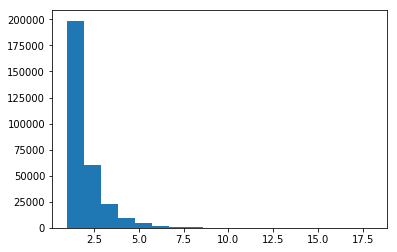

In [17]:
how_many_per('tumour', 'regimen')

In [3]:
levels = ['patient', 'tumour', 'regimen', 'cycle', 'drug_detail']
ID_graph = nx.DiGraph()
for i in range(len(levels)-1):
    table = pd.merge(tables['sact_' + levels[i]], tables['sact_' + levels[i+1]],
                     how='right')[["MERGED_" + levels[i].upper() + "_ID",
                                   "MERGED_" + levels[i+1].upper() + "_ID"]]
    edges = pd.DataFrame()
    edges['left'] = levels[i]+"_"+table["MERGED_" + levels[i].upper() + "_ID"].astype(str)
    edges['right'] = levels[i+1]+"_"+table["MERGED_" + levels[i+1].upper() + "_ID"].astype(str)
    ID_graph.add_edges_from(edges.values)

In [5]:
date_titles = [None, None,    # get from av tables
               "START_DATE_OF_REGIMEN", "START_DATE_OF_CYCLE", "ADMINISTRATION_DATE"]
for i in range(2, len(levels)):
    pos_df = pd.DataFrame()
    pos_df["node"] = levels[i] + "_" + tables['sact_' + levels[i].lower()][
        "MERGED_" + levels[i].upper() + "_ID"].astype(str)
    pos_df["time"]=tables['sact_' + levels[i].lower()][
        date_titles[i]].astype(int)
    pos_df["level"]=i
    pos_dict = dict(zip(pos_df.node, list(zip(pos_df["level"], pos_df["time"]))))
    nx.set_node_attributes(ID_graph, pos_dict, 'position')

In [8]:
def plot_path(tumour_id):
    path = nx.descendants(ID_graph,'tumour_'+str(tumour_id))
    path_graph = ID_graph.subgraph(path)
    pos_dict = nx.get_node_attributes(path_graph, 'position')
    fig = plt.figure(figsize=(12,8))
    nx.draw_networkx(path_graph, pos_dict)
    plt.axis('off')
    plt.gca().invert_yaxis()

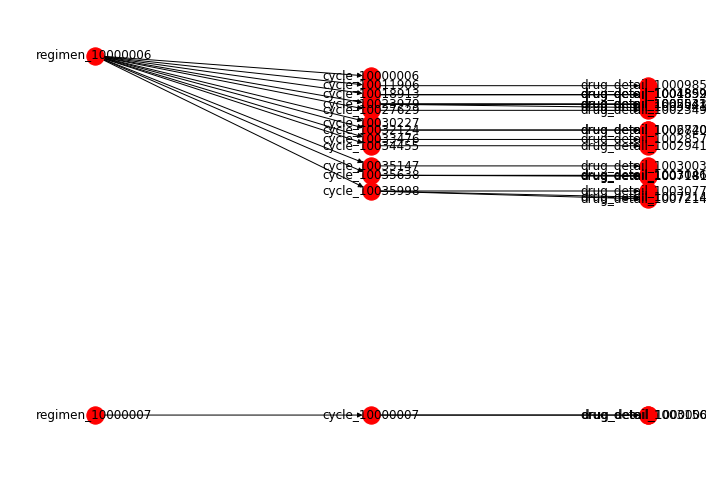

In [9]:
plot_path(10000006)